In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
from sqlalchemy import create_engine
from dotenv import load_dotenv
import os

# ▒ 한글 폰트 설정 (플랫폼별 처리)
import platform
if platform.system() == 'Darwin':
    plt.rcParams['font.family'] = 'AppleGothic'
elif platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
else:
    plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

# ▒ .env 환경변수 로드
load_dotenv()
host = os.getenv("DB_HOST")
user = os.getenv("DB_USER")
password = os.getenv("DB_PASSWORD")
database = os.getenv("DB_NAME")

# ▒ DB 연결
engine = create_engine(f"mysql+pymysql://{user}:{password}@{host}:3306/{database}")


In [15]:
query1 = """
SELECT station_name, annual_avg
FROM pollution_co_concentration_by_station
WHERE province = '서울'
"""
query2 = """
SELECT * FROM pollution_co_concentration_by_station
"""

df = pd.read_sql(query1, engine)
df.rename(columns={'station_name' : '자치구',
                   'annual_avg' : 'CO 농도'},
          inplace=True)
df

,자치구,CO 농도
0,중구,0.44
1,종로구,0.49
2,중랑구,0.40
3,동대문구,0.46
4,은평구,0.48
5,마포구,0.46
6,영등포구,0.45
7,동작구,0.40
8,관악구,0.49
9,강남구,0.41


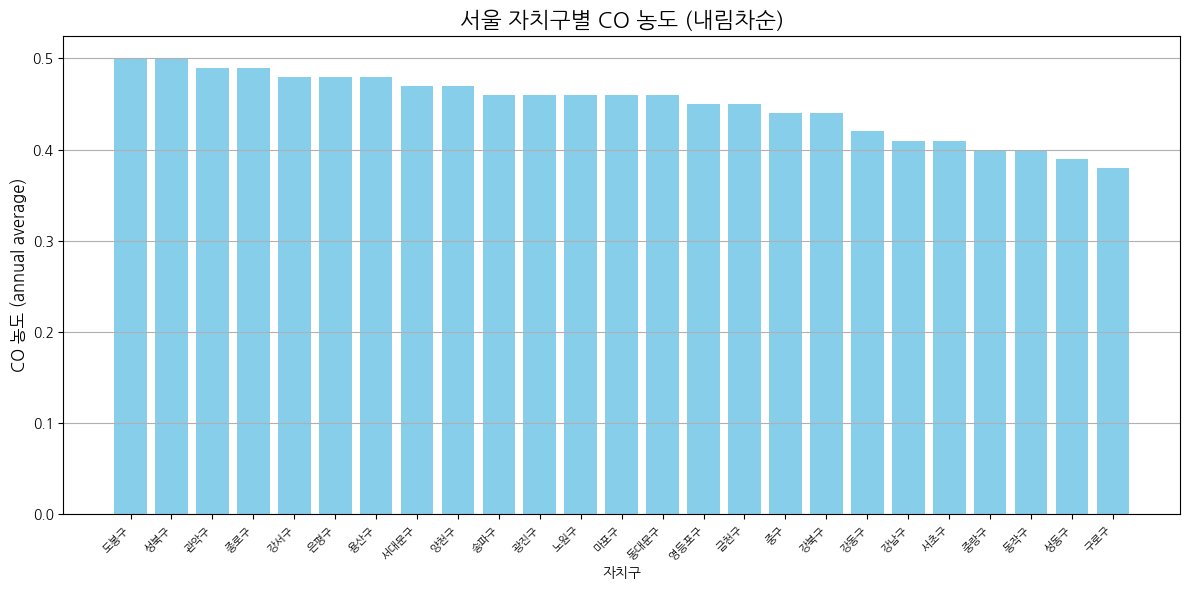

In [27]:
df_sorted = df.sort_values('CO 농도', ascending=False)

# # Plotting CO 농도 by 자치구 using bar plot
# plt.figure(figsize=(12, 6))
# plt.bar(df_sorted['자치구'], df_sorted['CO 농도'], color = 'orange')
# plt.title('서울 자치구별 CO 농도')
# plt.xlabel('자치구')
# plt.ylabel('CO 농도 (annual average)')
# plt.grid(axis='y')
# plt.show()


plt.figure(figsize=(12, 6))
plt.bar(df_sorted['자치구'], df_sorted['CO 농도'], color='skyblue')
plt.title('서울 자치구별 CO 농도 (내림차순)', fontsize=16)
plt.xlabel('자치구', fontsize=10)
plt.ylabel('CO 농도 (annual average)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=8)  # 폰트 크기 축소
plt.yticks(fontsize=10)
plt.tight_layout()
plt.grid(axis='y')
plt.show()

In [33]:
%cd ../../..

/


/home/park/eda-repo-3


In [39]:

# ▶️ csv 불러오기 경로 지정
input_path = os.path.join('RESULT','csv','seoul_integrated_data.csv')
# input_path = 'RESULT/csv/seoul_integrated_data.csv'
# os.path.dirname(output_path)
df = pd.read_csv(input_path)
df

,district,companion_animal_registration,seoul_animal_hospital,hospital_count,beauty_count,pharmacy_count,animal_trust_count,korea_urban_park_info,abandon_count,deceased_count,seoul_noise_vibration_complaint,pollution_co_concentration_by_station,pollution_emission_facility,seoul_abandonment_statistics,1인당 공원 면적,1인당 도시공원 면적,1인당 도보생활권 공원면적
0,강남구,34843.0,94.0,94.0,154.0,287.0,102.0,133.0,141.0,41.0,9494.0,0.411,456.0,243.4,14.16,11.82,6.73
1,강동구,25515.0,59.0,47.0,87.0,156.0,37.0,74.0,258.0,70.0,2361.0,0.439,140.0,394.6,7.36,6.19,4.59
2,강북구,18585.0,27.0,27.0,56.0,69.0,28.0,54.0,221.0,100.0,1311.0,0.442,87.0,357.4,49.73,8.16,7.27
3,강서구,33636.0,50.0,50.0,101.0,146.0,60.0,151.0,222.0,117.0,2685.0,0.480,373.0,335.4,7.95,6.04,6.21
4,관악구,26408.0,27.0,27.0,57.0,118.0,34.0,60.0,261.0,110.0,1842.0,0.488,83.0,780.6,25.08,24.95,3.95
5,광진구,20272.0,36.0,33.0,56.0,89.0,22.0,43.0,163.0,69.0,1329.0,0.450,84.0,265.4,9.85,8.53,3.85
6,구로구,19412.0,29.0,29.0,45.0,92.0,13.0,62.0,178.0,89.0,1114.0,0.378,274.0,218.0,8.93,8.01,4.01
7,금천구,12925.0,16.0,16.0,40.0,62.0,24.0,52.0,153.0,83.0,1237.0,0.447,387.0,188.8,11.51,10.83,2.34
8,노원구,27138.0,45.0,45.0,83.0,117.0,24.0,4.0,182.0,90.0,1078.0,0.462,151.0,298.2,29.31,28.65,3.77
9,도봉구,19873.0,26.0,26.0,59.0,73.0,21.0,71.0,178.0,67.0,740.0,0.497,124.0,281.0,32.80,4.04,3.63


In [44]:
df_companion = df.iloc[:, [0,1]]
df_companion.rename(columns={
  'district' : '자치구',
  'companion_animal_registration' : '반려동물 등록수'}, inplace=True)
df_companion

/tmp/ipykernel_30017/3163005501.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_companion.rename(columns={


,자치구,반려동물 등록수
0,강남구,34843.0
1,강동구,25515.0
2,강북구,18585.0
3,강서구,33636.0
4,관악구,26408.0
5,광진구,20272.0
6,구로구,19412.0
7,금천구,12925.0
8,노원구,27138.0
9,도봉구,19873.0


In [46]:
df_sorted

,자치구,CO 농도
17,도봉구,0.50
13,성북구,0.50
8,관악구,0.49
1,종로구,0.49
21,강서구,0.48
4,은평구,0.48
14,용산구,0.48
18,서대문구,0.47
23,양천구,0.47
22,송파구,0.46


In [48]:
df_merge = pd.merge(df_companion, df_sorted, on='자치구', how='outer')
df_merge

,자치구,반려동물 등록수,CO 농도
0,강남구,34843.0,0.41
1,강동구,25515.0,0.42
2,강북구,18585.0,0.44
3,강서구,33636.0,0.48
4,관악구,26408.0,0.49
5,광진구,20272.0,0.46
6,구로구,19412.0,0.38
7,금천구,12925.0,0.45
8,노원구,27138.0,0.46
9,도봉구,19873.0,0.50


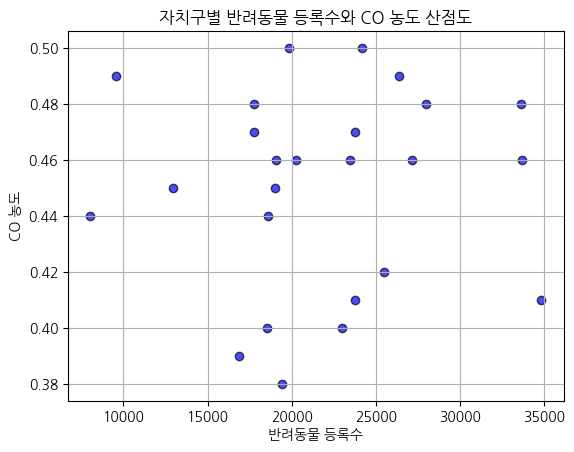

In [50]:
# x축: 반려동물 등록수, y축: CO 농도
plt.scatter(df_merge['반려동물 등록수'], df_merge['CO 농도'], color='blue', alpha=0.7, edgecolors='black')

plt.xlabel('반려동물 등록수')
plt.ylabel('CO 농도')
plt.title('자치구별 반려동물 등록수와 CO 농도 산점도')
plt.grid(True)
plt.show()

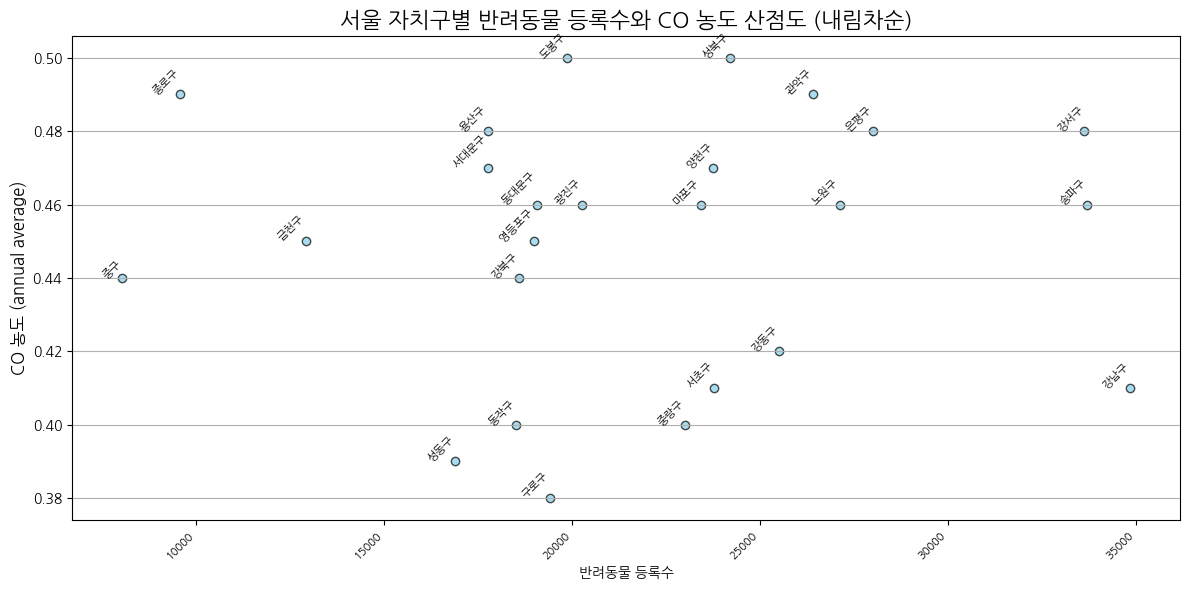

In [53]:
# Assuming df_merge is the dataframe containing the relevant data
plt.figure(figsize=(12, 6))
plt.scatter(df_merge['반려동물 등록수'], df_merge['CO 농도'], color='skyblue', alpha=0.7, edgecolors='black')

# 각 점에 자치구 이름 라벨 표시
for i, txt in enumerate(df_merge['자치구']):
    plt.annotate(txt, 
                 (df_merge['반려동물 등록수'].iloc[i], df_merge['CO 농도'].iloc[i]), 
                 fontsize=8, rotation=45, ha='right')

plt.title('서울 자치구별 반려동물 등록수와 CO 농도 산점도 (내림차순)', fontsize=16)
plt.xlabel('반려동물 등록수', fontsize=10)
plt.ylabel('CO 농도 (annual average)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=8)  # 폰트 크기 축소
plt.yticks(fontsize=10)
plt.grid(axis='y')
plt.tight_layout()
# plt.show()

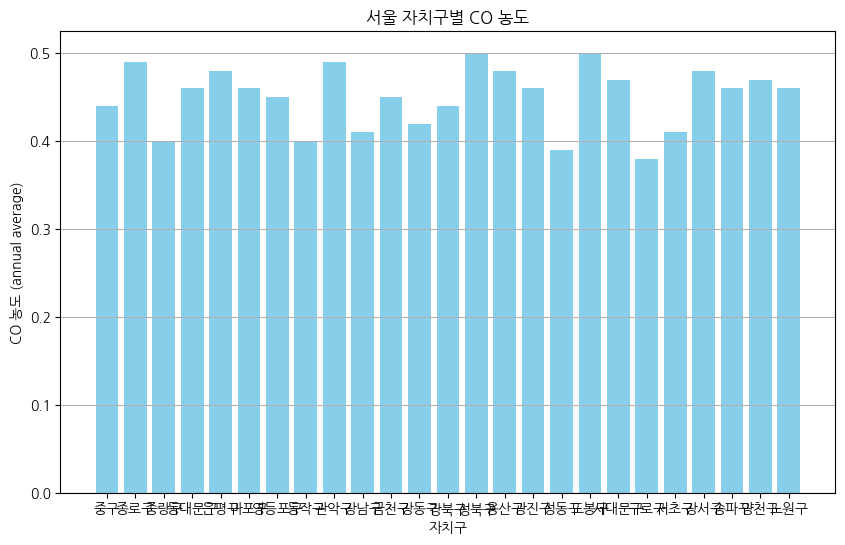

In [20]:
# 1. 자치구별 CO 농도 막대그래프
plt.figure(figsize=(10, 6))
plt.bar(df['자치구'], df['CO 농도'], color='skyblue')
plt.title('서울 자치구별 CO 농도')
plt.xlabel('자치구')
plt.ylabel('CO 농도 (annual average)')
plt.grid(axis='y')
plt.show()


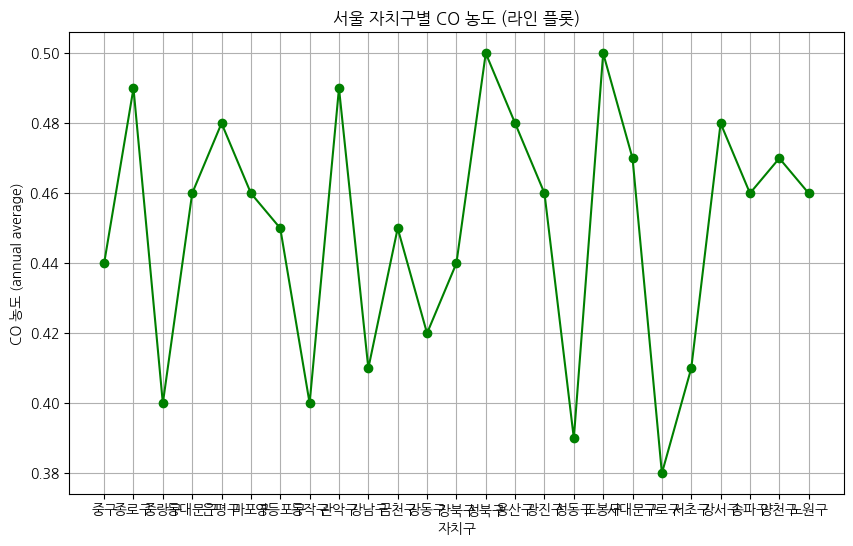

In [21]:
# 2. 자치구별 CO 농도 라인플롯
plt.figure(figsize=(10, 6))
plt.plot(df['자치구'], df['CO 농도'], marker='o', linestyle='-', color='green')
plt.title('서울 자치구별 CO 농도 (라인 플롯)')
plt.xlabel('자치구')
plt.ylabel('CO 농도 (annual average)')
plt.grid(True)
plt.show()
